Project aim is: determine which of the plans brings in more revenue in order to adjust the advertising budget.

Step 1: Open the data file and study the general information

Step 2: Prepare the data

Step 3: Analyze the data

Step 4: Test the hypotheses

Step 5: Overall conclusion

# Step 1. Open the data file and study the general information

Let's import the tools that we will use in this project.

In [5]:
pip install -U sidetable

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: sidetable in /home/jovyan/.local/lib/python3.7/site-packages (0.9.0)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sidetable
import warnings
import datetime as dt
import seaborn as sns

Let's read the data.

In [7]:
try:
    calls = pd.read_csv(r'C:\Users\Ron\Documents\megaline_calls.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')

In [8]:
try:
    internet = pd.read_csv(r'C:\Users\Ron\Documents\megaline_internet.csv')
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')

In [9]:
try:
    messages = pd.read_csv(r'C:\Users\Ron\Documents\megaline_messages.csv')
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')

In [10]:
try:
    plans = pd.read_csv(r'C:\Users\Ron\Documents\megaline_plans.csv')
except:
    plans = pd.read_csv('/datasets/megaline_plans.csv')

In [11]:
try:
    users = pd.read_csv(r'C:\Users\Ron\Documents\megaline_users.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')

Let's study the data at first glance.

In [12]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The call_date column on calls needs to be data time and not object.

In [10]:
calls.stb.missing()

,missing,total,percent
id,0,137735,0.0
user_id,0,137735,0.0
call_date,0,137735,0.0
duration,0,137735,0.0


In [11]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Look like we have some outliers in the duration column. 

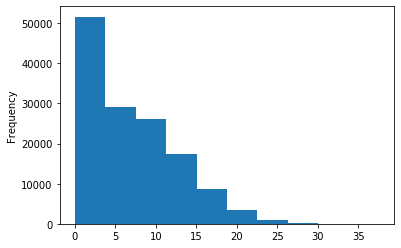

In [12]:
calls['duration'].plot(kind='hist')
plt.show()

The majority of the calls are between 2.5 - 12 minutes. There are a lot of calls with no duration. We will consider them as missed calls.

In [13]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


The session_date column on the internet data needs to be data time and not object.

In [15]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


There is a massive difference between Q3 to the max in the mb_used column.

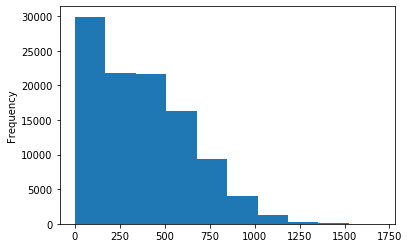

In [16]:
internet['mb_used'].plot(kind='hist')
plt.show()

Most of the mb_used is between 0 - 550 megabytes per month.

In [17]:
internet.stb.missing()

,missing,total,percent
id,0,104825,0.0
user_id,0,104825,0.0
session_date,0,104825,0.0
mb_used,0,104825,0.0


In [18]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The message_date column on the messages data needs to be data time and not object.

In [20]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [21]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [22]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [23]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [24]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


There are missing values in churn_date. This is because those users are still active.

In [26]:
users[users.churn_date.isnull()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [27]:
users[users.churn_date.notna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


In [28]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


# Step 2. Prepare the data


There are missing values in the user data in the churn_date column. This is because this user is still active. let's create another category called 'active user.'

In [29]:
users['churn_date'] = users['churn_date'].fillna('active_user')

Convert the data to the necessary types


In [30]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Let's convert those columns to int.

In [31]:
calls['duration'] = calls['duration'].astype(np.int64, errors='ignore')
internet['mb_used'] = internet['mb_used'].astype(np.int64, errors='ignore')

We need to round up call duration to complete minutes.

In [32]:
calls['duration'] = np.ceil(calls['duration'])

We will need to create another column that takes only the month from each column to do this.

In [33]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

That good. Let's group the user_id and the month by (duration, mb_used, and SMS) for each data. Then, we will convert them into to data frame.

In [34]:
data_used_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum()
sms_per_user = messages.groupby(['user_id', 'month'])['message_date'].count()
calls_per_user = calls.groupby(['user_id', 'month'])['duration'].sum()

In [35]:
calls_per_user = calls_per_user.to_frame()
sms_per_user = sms_per_user.to_frame()
data_used_per_user = data_used_per_user.to_frame()

In [36]:
data_frames = [data_used_per_user, calls_per_user, sms_per_user]

We will elegantly merge them with a lambda function by user id and the month.

In [37]:
from functools import reduce

In [38]:
data_merged = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames)

merge users plan to data_merged:

In [39]:
megaline_plan_per_user = users[['user_id', 'plan']]

In [40]:
data_frames2 = [data_merged, megaline_plan_per_user]

In [41]:
data_merged2 = reduce(lambda left,right: pd.merge(left,right,on=['user_id'], how='outer'), data_frames2)

Let's change the names of the columns for better understanding.

In [42]:
data_merged2.rename(columns={'mb_used': 'gb_used', 'message_date': 'messages_count'}, inplace=True)


In [43]:
data_merged2.head()

,user_id,gb_used,duration,messages_count,plan
0,1000,1899.0,108.0,11.0,ultimate
1,1001,6908.0,160.0,30.0,surf
2,1001,13294.0,278.0,44.0,surf
3,1001,22308.0,348.0,53.0,surf
4,1001,18477.0,379.0,36.0,surf


Now let's convert the mg column to GB.

In [44]:
data_merged2['gb_used'] = data_merged2['gb_used'] / 1000

In [45]:
data_merged2.head()

,user_id,gb_used,duration,messages_count,plan
0,1000,1.899,108.0,11.0,ultimate
1,1001,6.908,160.0,30.0,surf
2,1001,13.294,278.0,44.0,surf
3,1001,22.308,348.0,53.0,surf
4,1001,18.477,379.0,36.0,surf


In [46]:
data_merged2['gb_used'] = np.ceil(data_merged2['gb_used'])

In [47]:
data_merged2.head()

,user_id,gb_used,duration,messages_count,plan
0,1000,2.0,108.0,11.0,ultimate
1,1001,7.0,160.0,30.0,surf
2,1001,14.0,278.0,44.0,surf
3,1001,23.0,348.0,53.0,surf
4,1001,19.0,379.0,36.0,surf


Now we have excellent merge data with the  mb_used round up to a gigabyte, the duration that rounds up to minutes, SMS, and the plan for each user_id.

Let's create a function that calculates the user's revenue based on the logic of the plans.

In [48]:
def rev(row):

    total_revenue = 0

    plan = row['plan']
    gb_used = row['gb_used']
    duration = row['duration']
    messages_count = row['messages_count']
    if plan == 'surf':
        fee=20
        if duration>500:
            call_revenue=(duration - 500) * 0.03
        else:
            call_revenue=0
        if gb_used> 15:
            gb_revenue = (gb_used-15) * 10
        else:
            gb_revenue = 0
        if messages_count> 50:
            messages_count_revenue = (messages_count-50) * 0.03
        else:
            messages_count_revenue = 0
    else:
        if plan == 'ultimate':
            fee=70
        if duration>3000:
            call_revenue=(duration-3000) * 0.01
        else:
            call_revenue=0
        if gb_used> 30:
            gb_revenue = (gb_used-30) * 7
        else:
            gb_revenue = 0
        if messages_count> 1000:
            messages_count_revenue = (messages_count-1000) * 0.01
        else:
            messages_count_revenue = 0
    total_revenue=fee+call_revenue+messages_count_revenue+gb_revenue
    return total_revenue           

Now let's apply the function to our data with a new column.

In [49]:
data_merged2['total_revenue'] = data_merged2.apply(rev, axis=1)
data_merged2.head()

,user_id,gb_used,duration,messages_count,plan,total_revenue
0,1000,2.0,108.0,11.0,ultimate,70.00
1,1001,7.0,160.0,30.0,surf,20.00
2,1001,14.0,278.0,44.0,surf,20.00
3,1001,23.0,348.0,53.0,surf,100.09
4,1001,19.0,379.0,36.0,surf,60.00


# Step 3. Analyze the data


Step 3. Analyze the data
use the describe mathod to Calculate the mean, dispersion, and standard deviation
and plot a histograms. Describe the distributions.

Let's start looking at each column.

In [50]:
data_merged2['gb_used'].describe()

count    2277.000000
mean       17.351339
std         7.860854
min         1.000000
25%        13.000000
50%        17.000000
75%        22.000000
max        71.000000
Name: gb_used, dtype: float64

The average user uses 17 GB a month.
Std is 7.860854.
The Median is 17.
The distribution is positively skewed if the mean is greater than the median—let's look at this with a histogram.

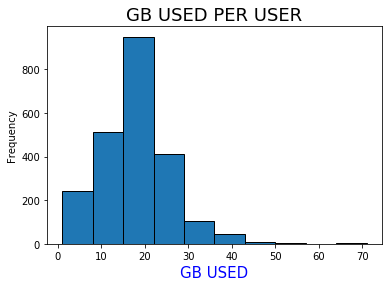

In [51]:
gb_used_hist = data_merged2['gb_used'].plot(kind='hist', bins=10, ec='black')
gb_used_hist.set_title('GB USED PER USER',fontsize=18)
gb_used_hist.set_xlabel('GB USED', fontsize=15, color='blue')

plt.show()

We can see that the majority of the users use between 15 to 25 GB, and that is just between the two plan GB usage borders.
The data is skewed a bit to the right.

In [52]:
data_merged2['messages_count'].describe()

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: messages_count, dtype: float64

Average user texts 42 times a month.
The median is 34 texts a month.
std is 33.122931

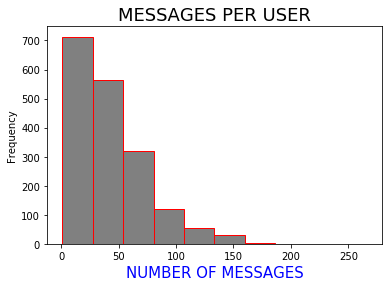

In [53]:
num_messages_hist = data_merged2['messages_count'].plot(kind='hist', color='0.5', ec='red')
num_messages_hist.set_title('MESSAGES PER USER', fontsize=18)
num_messages_hist.set_xlabel('NUMBER OF MESSAGES', fontsize=15, color='blue')
plt.show()

messages_count is an account for SMS count. we can see that the data hes a right skew distribution. and there are some outliers (heavy Sleep texter on the right).

In [54]:
data_merged2['plan'].describe()

count     2303
unique       2
top       surf
freq      1579
Name: plan, dtype: object

We need numeric values to see std, mean, median, and plot histograms. Let's use a function to analyze the plan.

In [55]:
def plan_id(row):
    plan_id = row['plan']
    if plan_id == 'surf':
        return 1
    elif plan_id == 'ultimate':
        return 2    
    else:
        return 0
    
data_merged2['plan_id'] = data_merged2.apply(plan_id, axis=1)

We created a plan id column.

In [56]:
data_merged2.head(3)

,user_id,gb_used,duration,messages_count,plan,total_revenue,plan_id
0,1000,2.0,108.0,11.0,ultimate,70.0,2
1,1001,7.0,160.0,30.0,surf,20.0,1
2,1001,14.0,278.0,44.0,surf,20.0,1


In [57]:
data_merged2['plan_id'].describe()

count    2303.000000
mean        1.314373
std         0.464366
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: plan_id, dtype: float64

Mean is 1.314373.
The Median is 1.
Std is 0.464366.
Let's plot a histogram to look at the data more clearly.

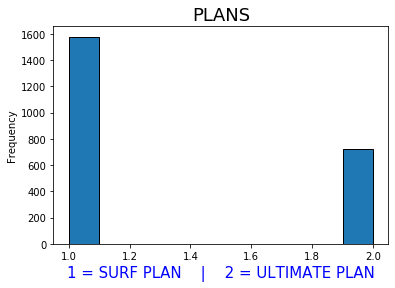

In [58]:
id_plan_hist = data_merged2['plan_id'].plot(kind='hist', ec='black')
id_plan_hist.set_title('PLANS', fontsize=18)
id_plan_hist.set_xlabel('1 = SURF PLAN    |    2 = ULTIMATE PLAN', fontsize=15, color='blue')
plt.show()

There are far more "surf" users than "ultimate." we can visually see it with a pie chart. 

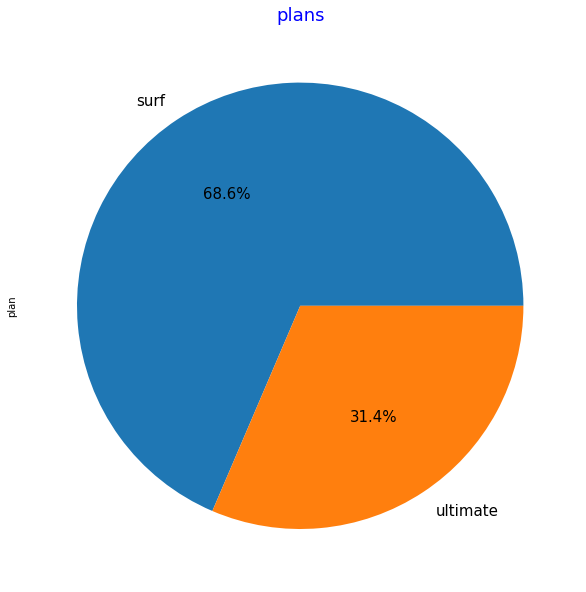

In [59]:
pie_chart_plan = data_merged2.plan.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%', fontsize=15)
pie_chart_plan.set_title('plans', color='blue', fontsize=18) 
plt.show()

69% use the "surf" plan, and 31% use the "ultimate" plan.

In [60]:
data_merged2['total_revenue'].describe()

count    2303.000000
mean       65.737173
std        47.973770
min        20.000000
25%        22.895000
50%        70.000000
75%        70.000000
max       596.980000
Name: total_revenue, dtype: float64

The average user is worth the company 65.737173 dollars a month.
The median revenue is 70.000000 dollars.
Std is 47.973770.

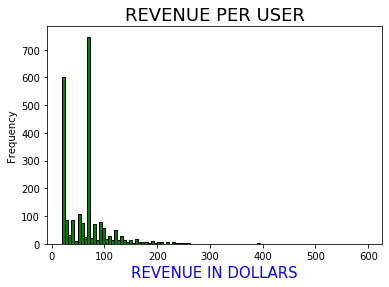

In [61]:
rev_hist = data_merged2['total_revenue'].plot(kind='hist', bins=100, ec='black', color='green')
rev_hist.set_title('REVENUE PER USER', fontsize=18)
rev_hist.set_xlabel("REVENUE IN DOLLARS", color='blue', fontsize=15)
plt.show()

We can see more "surfer" users than "ultimate" users, around 20 dollars. Maybe it's time to double down on a third plan, primarily because of the vast amount of internet usage and the majority of surfer users exceeding the limits of their plans. 

# Step 4. Test the hypotheses


Let's create two variables: one that slices the revenue to the ultimate plan and the surf plan.

In [62]:
ultimate_user = data_merged2.query('plan == "ultimate"')['total_revenue']

In [63]:
surf_user = data_merged2.query('plan == "surf"')['total_revenue']

Let's use the Levene library to find if the variance is equal between the two samples or not.

We will need to choose a significant level to be the threshold that determines when we will reject the null hypothesis. Our significant level will be 0.05 percent.

In [64]:
from scipy.stats import levene

In [65]:
levene(ultimate_user, surf_user, center='mean')

LeveneResult(statistic=598.5327016131625, pvalue=1.0952810329877642e-117)

pvalue=1.095 is above 0.05, we will consider the variances equal.

Now let's do an independent t-test with the two variables and the equal_var=True because of the Levene test results.

In [66]:
from scipy.stats import ttest_ind

In [67]:
alpha = 0.05 # set a critical statistical significance level

results = ttest_ind(ultimate_user, surf_user, equal_var=True) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)# print the p-value you get

if results.pvalue < alpha: #compare the p-value you get with the significance level:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.5412291384701134e-06
We reject the null hypothesis


We reject the null hypothesis, which means that The average revenue from Ultimate and Surf calling plans users differs.

Now let us test the hypothesis that The average revenue from users in the NY-NJ area is different from that of the users from other regions.


First, let's merge the city from user data to our data_merge2 by the user_id.

In [68]:
megaline_city_per_user = users[['user_id', 'city']]

In [69]:
data_frames3 = [data_merged2, megaline_city_per_user]
data_merged3 = reduce(lambda left,right: pd.merge(left,right,on=['user_id'], how='outer'), data_frames3)

In [70]:
data_merged3.head()

,user_id,gb_used,duration,messages_count,plan,total_revenue,plan_id,city
0,1000,2.0,108.0,11.0,ultimate,70.00,2,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,7.0,160.0,30.0,surf,20.00,1,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,14.0,278.0,44.0,surf,20.00,1,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,23.0,348.0,53.0,surf,100.09,1,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,19.0,379.0,36.0,surf,60.00,1,"Seattle-Tacoma-Bellevue, WA MSA"


the city is merged!

In [71]:
data_merged3['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 89
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

We will need to create two slices from the city column: one for New York and the other regions.

In [72]:
user_rev_per_new_york = data_merged3.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_revenue']

In [73]:
user_rev_per_other_region = data_merged3.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_revenue']

First, let's check if the variance is equal or not.

In [74]:
levene(user_rev_per_new_york, user_rev_per_other_region, center='mean')

LeveneResult(statistic=2.2389901423287375, pvalue=0.13470598298901465)

pvalue=0.13470598298901465 is way above our threshold of 0.05. So the variance is considered equal.

In [75]:
alpha = 0.05 # your code: set a critical statistical significance level

results = ttest_ind(user_rev_per_new_york, user_rev_per_other_region, equal_var=True) # your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)# your code: print the p-value you get)

if results.pvalue < alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.09792640256064623
We can't reject the null hypothesis


We reject the null hypothesis, which means that The average revenue from users in the NY-NJ area is different from that of users from other regions.

One thing we can do is to create a correlation heatmap between different columns in our data.

H0: The null hypothesis in the second question is that The average revenue from users in the NY-NJ area is not different from that of the users from other regions.

H1:The alternative hypothesis is The average revenue from users in the NY-NJ area is different from that of the users from other regions.

First, we will create a revenue column for new york users and clients in other regions using our variable from the test.

In [76]:
data_merged3['user_rev_per_new_york'] = user_rev_per_new_york

In [77]:
data_merged3['user_rev_per_other_region'] = user_rev_per_other_region

In [78]:
data_merged3.stb.missing()

,missing,total,percent
user_rev_per_new_york,1925,2303,83.586626
messages_count,497,2303,21.580547
user_rev_per_other_region,378,2303,16.413374
duration,45,2303,1.953973
gb_used,26,2303,1.128962
user_id,0,2303,0.000000
plan,0,2303,0.000000
total_revenue,0,2303,0.000000
plan_id,0,2303,0.000000
city,0,2303,0.000000


We are dealing with some missing values in the data. Let's fill each column by its median. We will not touch a column that has below 5% missing values.

In [79]:
data_merged3['user_rev_per_new_york'] = data_merged3['user_rev_per_new_york'].fillna(data_merged3['user_rev_per_new_york'].median())
data_merged3['user_rev_per_other_region'] = data_merged3['user_rev_per_other_region'].fillna(data_merged3['user_rev_per_new_york'].median())

In [80]:
data_merged3.stb.missing()

,missing,total,percent
messages_count,497,2303,21.580547
duration,45,2303,1.953973
gb_used,26,2303,1.128962
user_id,0,2303,0.000000
plan,0,2303,0.000000
total_revenue,0,2303,0.000000
plan_id,0,2303,0.000000
city,0,2303,0.000000
user_rev_per_new_york,0,2303,0.000000
user_rev_per_other_region,0,2303,0.000000


Now we are ready to create the heatmap.

In [81]:
heatmap = data_merged3.pivot_table(index='user_id', values=['user_rev_per_new_york', 'user_rev_per_other_region', 'plan_id', 'duration', 'messages_count', 'gb_used', 'total_revenue'], aggfunc='mean')

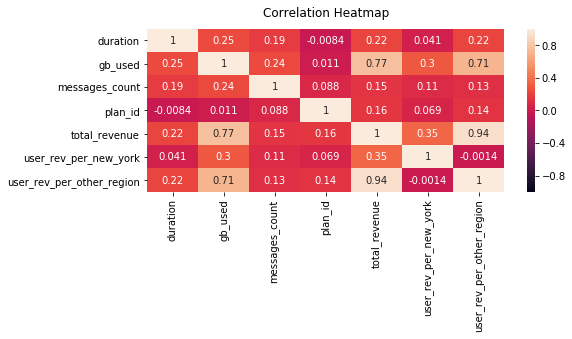

In [82]:
plt.figure(figsize=(8, 3))

heatmap = sns.heatmap(heatmap.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We find some answers: revenue for users in new york has a negative correlation from users in other regions.

 Here the negative correlation between new york to other regions is not too high, but it is still negative. With the t-test, we can reject the null hypothesis and root with The alternative hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from other regions.

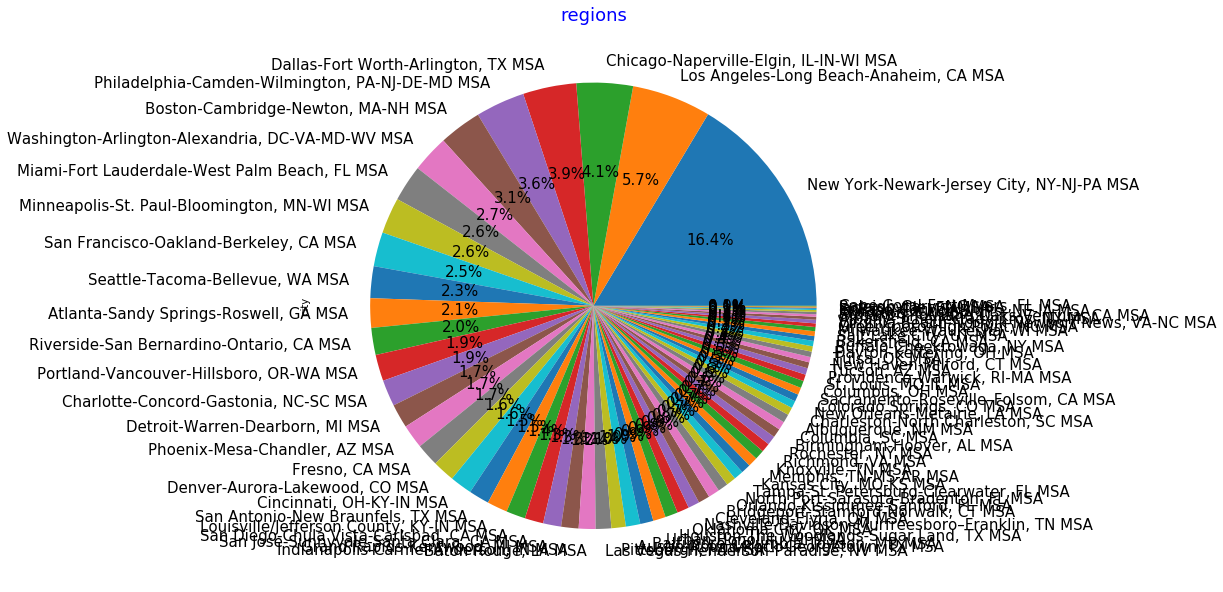

In [83]:
pie_chart_plan = data_merged3.city.value_counts().plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%', fontsize=15)
pie_chart_plan.set_title('regions', color='blue', fontsize=18)
labels = ['NY', 'OTHER REGIONS']
plt.show()

New York accounts for 16% of the company users, the rest is from other regions, but it is clear that the company's most significant area is new york.

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v1:</b>
    
The same comments here. 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>
    
- Well done! Hypotheses have been tested correctly. 

# Step 5. Write an overall conclusion


We came a long way from the beginning of the project.

- First, we learned the different datasets that were given to us.


- Then we prepare the data by changing data types, rounding up the necessary column on duration and GB usage. We filled the missing values on the churn_date column for active users. We check zero's in our data. We create a column for the month in all the datasets and merge the SMS, internet and calls column by the month and user_id. Then we also marge the plan for each user. We create a function to calculate the revenue per user and apply it to a revenue per user column in our merge data.


- We analyze each column in our data. First, we find the mean, median, and std. Then, we plot a histogram for the columns to see the data distribution.


- We find far more "surfer" users than "ultimate" users. Maybe it's time to double down on a third plan, primarily because of the vast amount of internet usage and the majority of surfer users exceeding the limits of their plans.


- The average user is worth the company 38.059053  dollars a month.


- We concluded that we could not reject our hypothesis that The average revenue from users of Ultimate and Surf calling plans differs.


- We also conclude that we can't reject our second hypothesis that The average revenue from users in the NY-NJ area is different from that of users from other regions.


- We create a heatmap on our table and find that users from new york have a negative correlation from people in other regions. This doesn't give us a sufficient answer, but it still makes our case stronger because we can't reject the hypothesis.


- On the other hand, we find a strong correlation of 0.77 between gb_used to the total revenue.


- And a strong correlation of 0.71 with people in another region to the gb_used.


- Maybe it's time to expand market share in other regions.

- Maybe it's a good idea to create a new plan that focuses on gb_used.

<div class="alert alert-success">
<b>Reviewer's comment v1</b>
 
Overall you conducted great research with correct interim findings, clean code and nice visualisation.

Great that you shared structured results and your observations.
   